# Project 2:Data Exploration
- Coire Gavin-Hanner
- 8/11/22

- **Future Note** check to see which data points had missing values for the engine volume...were they in the other category for engine type? They may be electric cars in which case missing values make sense and the data points should not be removed
- Engine Volume distribution is wonky

# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [9]:
df = pd.read_csv('cars_multiple_linearR.csv')

In [10]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


# Drop Unnecessary columns

In [12]:
df['Registration'].value_counts()

yes    3947
no      398
Name: Registration, dtype: int64

In [13]:
df['Body'].value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [14]:
df['Brand'].value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [15]:
df['Model'].value_counts()

E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
650          1
CLK 220      1
M6           1
CL 550       1
Virage       1
Name: Model, Length: 312, dtype: int64

There are too many unique values in the Model variable for that to be a useful column so I will drop it

In [16]:
df.drop(columns='Model', inplace=True)

In [17]:
non_comb = df['Engine Type'] == 'other'

df.drop(index = df.loc[non_comb].index, inplace=True)

# Duplicate Rows

In [18]:
df.duplicated().sum()

93

In [19]:
df[df.duplicated(keep=False)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016
29,Mercedes-Benz,NaN,crossover,0,4.60,Petrol,yes,2016
45,BMW,41000.0,crossover,80,3.00,Petrol,yes,2012
55,Mercedes-Benz,NaN,crossover,0,3.00,Diesel,yes,2016
73,Mercedes-Benz,20400.0,sedan,190,1.80,Gas,yes,2011
...,...,...,...,...,...,...,...,...
4231,Mercedes-Benz,NaN,crossover,27,3.00,Diesel,yes,2015
4274,Mercedes-Benz,109999.0,crossover,0,2.98,Diesel,yes,2016
4277,Mercedes-Benz,111999.0,crossover,0,3.00,Diesel,yes,2016
4311,Renault,10500.0,vagon,185,1.50,Diesel,yes,2011


In [20]:
df.drop_duplicates(inplace=True)

# Missing Values

In [21]:
df.isna().sum()

Brand             0
Price           145
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [22]:
(df.isna().sum().max()/len(df))*100

3.5277516462841016

In [23]:
df.loc[df['EngineV'].isna()]['Engine Type'].value_counts()

Petrol    46
Other     45
Diesel    43
Gas       16
Name: Engine Type, dtype: int64

not all of the cars with missing engine volumes are in the "other" category. Electric cars could fit in this category and it woud make sense for them to not have an engine volume, but since most of those with missing values are internal combustion, I will drop the rows with missing values

only about 3% of the data are missing values so I will just drop the rows with missing values. This is the best strategy because the target variable is one of the variables with missing values.

In [24]:
df.dropna(inplace=True)

# Inconsistencies in Categorical Data

In [25]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [26]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [27]:
df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [28]:
df['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [29]:
# for an american audience
df['Engine Type'].replace({'Petrol':'Gas'}, inplace=True)

In [30]:
df['Registration'].unique()

array(['yes', 'no'], dtype=object)

# Univariate Explorations

## Categorical Data

<AxesSubplot:>

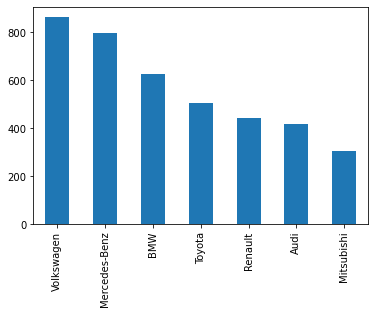

In [31]:
df['Brand'].value_counts().plot(kind='bar')

<AxesSubplot:>

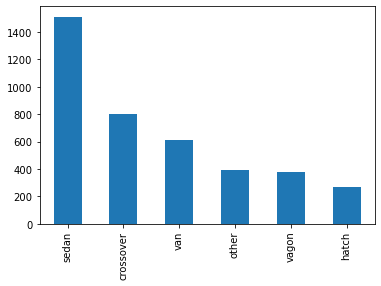

In [32]:
df['Body'].value_counts().plot(kind='bar')

<AxesSubplot:>

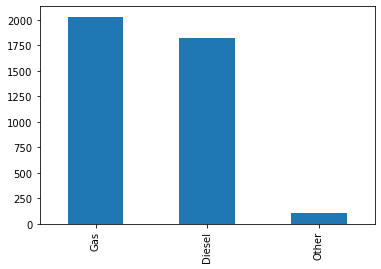

In [33]:
df['Engine Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

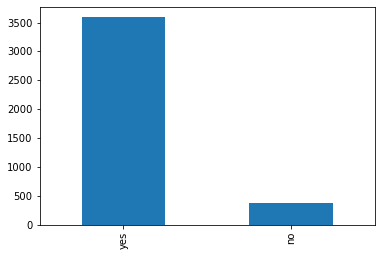

In [34]:
df['Registration'].value_counts().plot(kind='bar')

## Numerical Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4342
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3959 non-null   object 
 1   Price         3959 non-null   float64
 2   Body          3959 non-null   object 
 3   Mileage       3959 non-null   int64  
 4   EngineV       3959 non-null   float64
 5   Engine Type   3959 non-null   object 
 6   Registration  3959 non-null   object 
 7   Year          3959 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 278.4+ KB


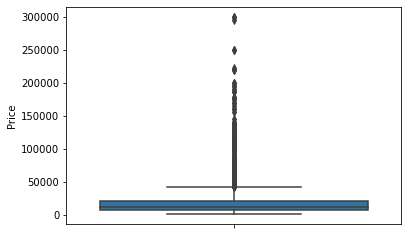

In [36]:
sns.boxplot(y='Price', data=df);

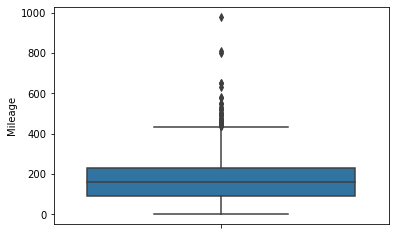

In [37]:
sns.boxplot(y='Mileage', data=df);

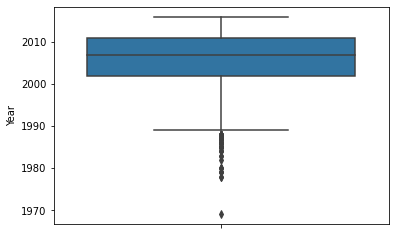

In [38]:
sns.boxplot(y='Year', data=df);

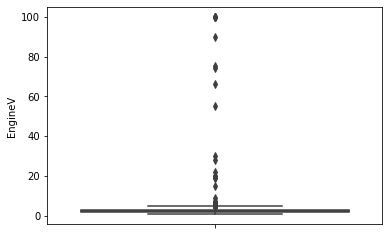

In [39]:
sns.boxplot(y='EngineV', data=df);

# Outliers

In [40]:
df.describe()

,Price,Mileage,EngineV,Year
count,3959.000000,3959.000000,3959.000000,3959.000000
mean,18926.857025,164.977014,2.763142,2006.277343
std,24545.658273,103.150267,4.974467,6.683857
min,600.000000,0.000000,0.600000,1969.000000
25%,6950.000000,93.000000,1.800000,2002.000000
50%,11300.000000,160.000000,2.200000,2007.000000
75%,21200.000000,230.000000,3.000000,2011.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [41]:
mile_filter = df['Mileage'] > 450

In [42]:
len(df.loc[mile_filter])

29

In [43]:
year_filter = df['Year'] == 2016
df.loc[year_filter]['Mileage'].max()

47

There are likely some outliers here in the mileage variable, but they are hard to distinguish from real values. An example of a likely outlier is entry 2607, a 2013 Mercedes that is recorded as driving 980,000 miles. This dataset is likely from 2016 as that is the most recent year recorded in it. If a car purchased in 2013 drove 980,000 miles in 3 years, it would have had to continuously drive close to 37 mph. 

Because it is likely that there is a mixture of incorrect values and true values in the outliers, I will not attempt to fix data beyond a certain threshold. There are only 29 data above 450,000 miles so i will simply delete them

In [44]:
df.drop(index=df.loc[mile_filter].index, inplace=True)

In [45]:
df.describe()

,Price,Mileage,EngineV,Year
count,3930.000000,3930.000000,3930.000000,3930.000000
mean,18995.872000,162.114758,2.766102,2006.341221
std,24593.253833,97.419763,4.992230,6.638915
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,92.000000,1.800000,2003.000000
50%,11450.000000,158.000000,2.200000,2007.000000
75%,21458.750000,230.000000,3.000000,2011.000000
max,300000.000000,450.000000,99.990000,2016.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3930 entries, 0 to 4342
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3930 non-null   object 
 1   Price         3930 non-null   float64
 2   Body          3930 non-null   object 
 3   Mileage       3930 non-null   int64  
 4   EngineV       3930 non-null   float64
 5   Engine Type   3930 non-null   object 
 6   Registration  3930 non-null   object 
 7   Year          3930 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 276.3+ KB


# Correlations?

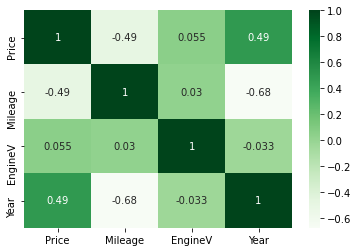

In [47]:
sns.heatmap(df.corr(), cmap='Greens', annot=True);

- price v mileage = -0.49
- price v year = 0.49
- mileage v year = -0.68

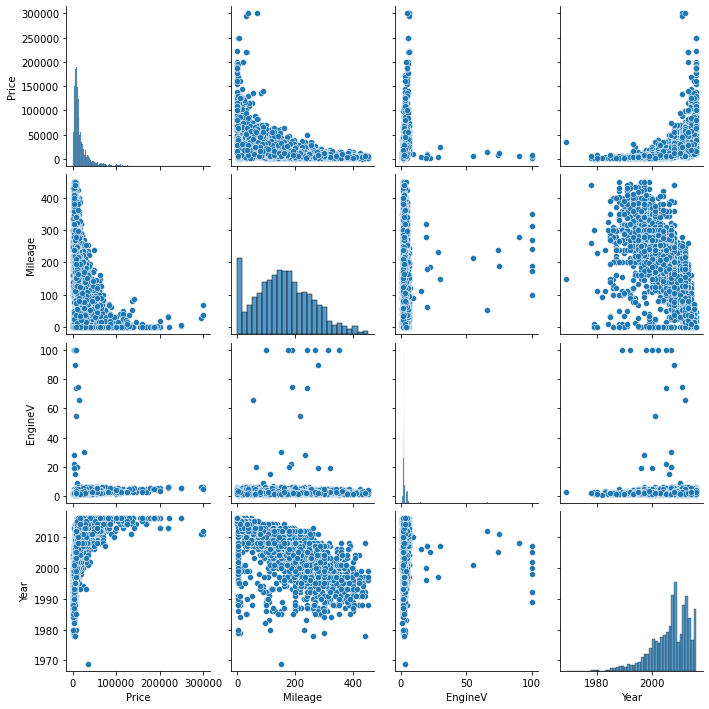

In [48]:
sns.pairplot(df)

There is moderate correlation between mileage and price, year and price, and mileage and year. Engine Volume is not correlated to any other variable

## Visualizations

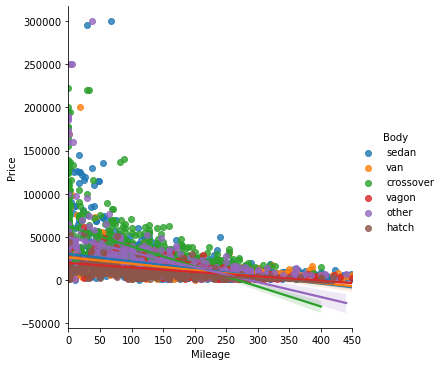

In [49]:
sns.lmplot(data=df, x='Mileage', y='Price', hue='Body');

In [50]:
df_expl = df.copy()

In [51]:
df_expl

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Gas,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Gas,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Gas,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Gas,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Gas,yes,1999


In [52]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [53]:
df_expl['Country of Origin'] = df['Brand'].copy()
df_expl.replace({'BMW':'Germany',
                'Mercedes-Benz':'Germany',
                'Audi':'Germany',
                'Volkswagen':'Germany',
                'Toyota':'Japan',
                'Mitsubishi':'Japan',
                'Renault':'France'}, inplace=True)

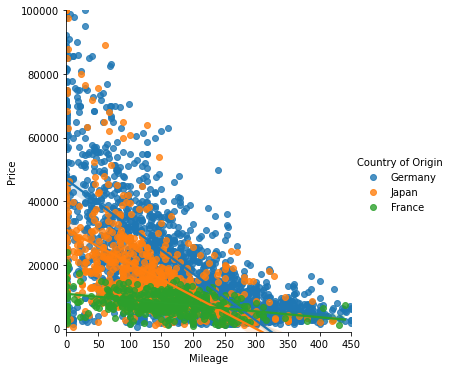

In [67]:
g = sns.lmplot(data=df_expl, x='Mileage', y='Price', hue='Country of Origin');
g.set(ylim=(-1000, 100000))
plt.savefig('price_v_mileage_by_country.png', bbox_inches='tight')

From this plot we can see that country of origin has a small effect on the correlation between mileage and price. French cars, here represented by Renault, depreciate at a slower rate than Japanese and German cars. Japanese cars are shown here to depreciate slightly slower than German cars. This trend may be driven by the high cost of lower-mileage German cars, as seen above. 

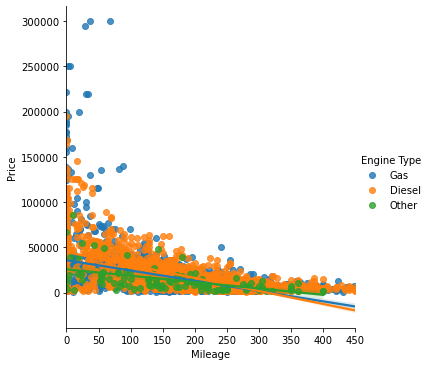

In [109]:
sns.lmplot(data=df_expl, x='Mileage', y='Price', hue='Engine Type');

Here we see that cars with engine types in the "other" category depreciate slower than Gas or Diesel cars with respect to mileage. We can also see that other-type cars tend to be less expensive than Diesel cars which are less expensive than Gas cars. To explore the price relationship more, I created the following boxplot to show the price distribution of cars in the dataset grouped by engine type (this is not one of the two visualizations for the assignment, I am just curious)

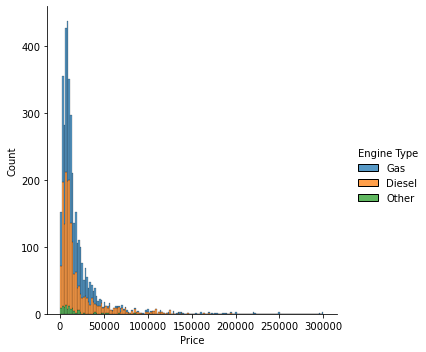

In [118]:
sns.displot(data = df_expl, x="Price", hue="Engine Type", multiple='stack')